# The Matrix Story: From Vectors to Transformations 🎭

## The Journey We've Taken

**What is a matrix, really?** It's a **transformation machine** that takes vectors from one space and moves them to another. Every matrix tells a story of how space itself can be stretched, rotated, flipped, or even collapsed.

**Our Learning Path:**
1. **🔗 Matrices & Vectors** → How matrices transform individual vectors
2. **🌍 Space Transformation** → How matrices reshape entire coordinate systems  
3. **🎨 Types of Transformations** → Scaling, rotation, shearing, reflection
4. **⚡ Composition** → Chaining transformations together
5. **🔧 Systems of Equations** → Solving real-world problems
6. **↩️ Matrix Inverses** → Undoing transformations
7. **📐 Determinants** → Understanding when transformations preserve information

**The Big Picture:** Every machine learning algorithm, every computer graphics effect, every data transformation you see is fundamentally about matrices moving vectors around in space. Let's see how it all connects! 🚀

In [1]:
# Essential imports for our matrix story
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("🎬 Ready to tell the complete matrix story!")
print("📊 All visualization tools loaded")

🎬 Ready to tell the complete matrix story!
📊 All visualization tools loaded


## Chapter 1: The Transformation Machine 🎰

**The Core Insight:** A matrix **A** is a function that takes any vector **v** and produces a new vector **Av**. But it's not just any function - it's a **linear transformation** that follows two rules:

1. **Additivity:** A(u + v) = Au + Av  
2. **Homogeneity:** A(cv) = c(Av)

**What this means:** Matrices preserve the "straightness" of lines and keep the origin fixed. But they can stretch, rotate, shear, and flip space in fascinating ways.

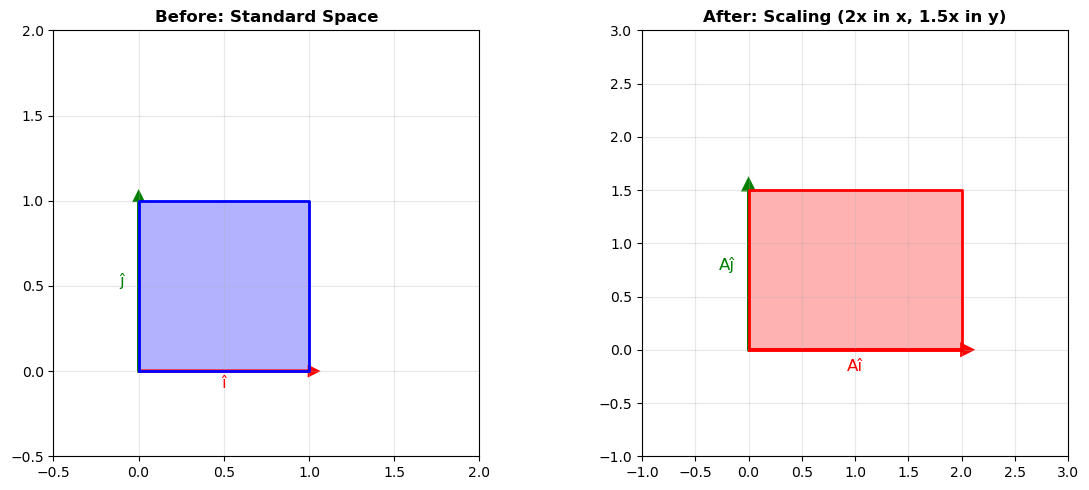

Matrix A = 
[[2.  0. ]
 [0.  1.5]]
Determinant = 3.00 (area scaling factor)
î → [2.0, 0.0]
ĵ → [0.0, 1.5]

💡 Key Insight: The columns of A tell us where the basis vectors î and ĵ go!
   This completely determines how ALL vectors transform.


In [2]:
# The fundamental matrix transformation story
def show_transformation(A, title):
    """Show how a matrix transforms the unit square and basis vectors"""
    # Original unit square and basis vectors
    square = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])
    i_hat = np.array([[0, 1], [0, 0]])  # Unit vector i
    j_hat = np.array([[0, 0], [0, 1]])  # Unit vector j
    
    # Transform everything
    transformed_square = A @ square
    transformed_i = A @ i_hat
    transformed_j = A @ j_hat
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Before transformation
    ax1.plot(square[0], square[1], 'b-', linewidth=2, label='Unit Square')
    ax1.fill(square[0], square[1], alpha=0.3, color='blue')
    ax1.arrow(0, 0, 1, 0, head_width=0.05, head_length=0.05, fc='red', ec='red', linewidth=2)
    ax1.arrow(0, 0, 0, 1, head_width=0.05, head_length=0.05, fc='green', ec='green', linewidth=2)
    ax1.text(0.5, -0.1, 'î', fontsize=12, ha='center', color='red')
    ax1.text(-0.1, 0.5, 'ĵ', fontsize=12, ha='center', color='green')
    ax1.set_xlim(-0.5, 2)
    ax1.set_ylim(-0.5, 2)
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.set_title('Before: Standard Space', fontweight='bold')
    
    # After transformation
    ax2.plot(transformed_square[0], transformed_square[1], 'r-', linewidth=2, label='Transformed')
    ax2.fill(transformed_square[0], transformed_square[1], alpha=0.3, color='red')
    ax2.arrow(0, 0, A[0,0], A[1,0], head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=2)
    ax2.arrow(0, 0, A[0,1], A[1,1], head_width=0.1, head_length=0.1, fc='green', ec='green', linewidth=2)
    ax2.text(A[0,0]/2, A[1,0]/2-0.2, 'Aî', fontsize=12, ha='center', color='red')
    ax2.text(A[0,1]/2-0.2, A[1,1]/2, 'Aĵ', fontsize=12, ha='center', color='green')
    ax2.set_xlim(-1, 3)
    ax2.set_ylim(-1, 3)
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.set_title(f'After: {title}', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Show the matrix and its effect
    print(f"Matrix A = \n{A}")
    print(f"Determinant = {np.linalg.det(A):.2f} (area scaling factor)")
    print(f"î → [{A[0,0]}, {A[1,0]}]")
    print(f"ĵ → [{A[0,1]}, {A[1,1]}]")

# Example: Simple scaling transformation
scaling_matrix = np.array([[2, 0], [0, 1.5]])
show_transformation(scaling_matrix, "Scaling (2x in x, 1.5x in y)")

print("\n💡 Key Insight: The columns of A tell us where the basis vectors î and ĵ go!")
print("   This completely determines how ALL vectors transform.")

## Chapter 2: The Gallery of Transformations 🎨

**The Plot Twist:** Different matrices create different types of transformations. Each has a unique "personality" and use case:

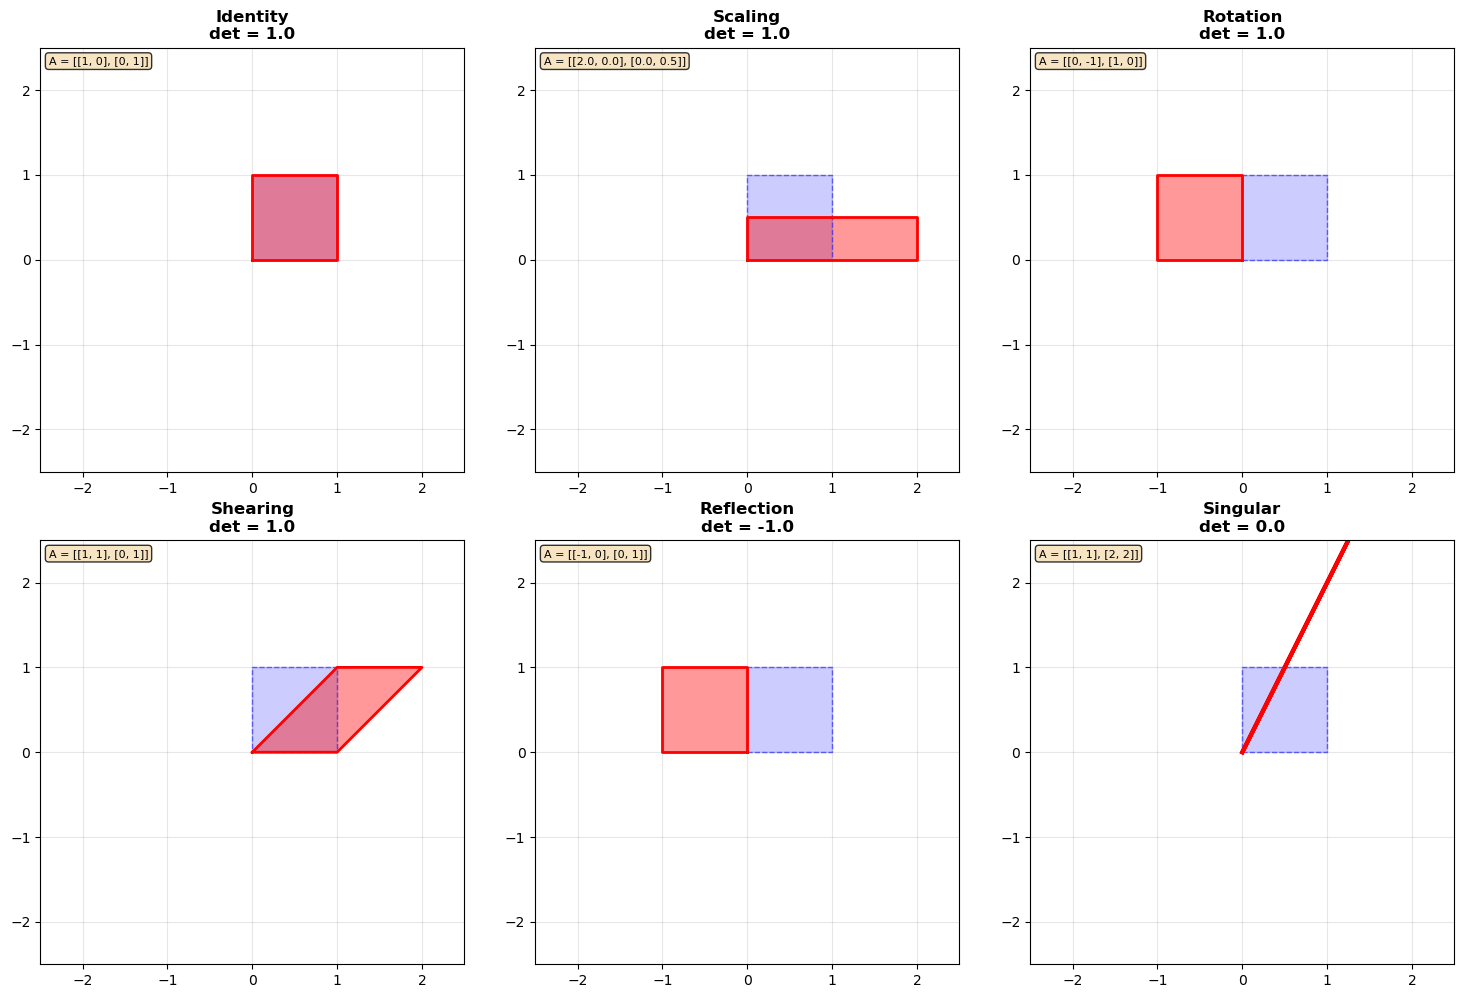

🎭 TRANSFORMATION PERSONALITIES:
• Identity: 'I do nothing' - preserves everything
• Scaling: 'I stretch/compress' - changes size
• Rotation: 'I spin things around' - preserves shape & size
• Shearing: 'I push parallel planes' - creates slant
• Reflection: 'I flip like a mirror' - reverses orientation
• Singular: 'I collapse dimensions' - destroys information


In [3]:
# The transformation gallery - key matrix types
transformations = {
    "Identity": np.array([[1, 0], [0, 1]]),
    "Scaling": np.array([[2, 0], [0, 0.5]]),
    "Rotation": np.array([[0, -1], [1, 0]]),  # 90° rotation
    "Shearing": np.array([[1, 1], [0, 1]]),
    "Reflection": np.array([[-1, 0], [0, 1]]),  # Flip across y-axis
    "Singular": np.array([[1, 1], [2, 2]])     # Collapses to line
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Original unit square
square = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])

for idx, (name, matrix) in enumerate(transformations.items()):
    ax = axes[idx]
    
    # Transform the square
    transformed = matrix @ square
    
    # Plot original (light)
    ax.plot(square[0], square[1], 'b--', alpha=0.5, linewidth=1, label='Original')
    ax.fill(square[0], square[1], alpha=0.2, color='blue')
    
    # Plot transformed
    if name == "Singular":
        ax.plot(transformed[0], transformed[1], 'r-', linewidth=3, label='Collapsed')
    else:
        ax.plot(transformed[0], transformed[1], 'r-', linewidth=2, label='Transformed')
        ax.fill(transformed[0], transformed[1], alpha=0.4, color='red')
    
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(f'{name}\ndet = {np.linalg.det(matrix):.1f}', fontweight='bold')
    
    # Add matrix as text
    ax.text(0.02, 0.98, f'A = {matrix.tolist()}', transform=ax.transAxes, 
            verticalalignment='top', fontsize=8, 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print("🎭 TRANSFORMATION PERSONALITIES:")
print("• Identity: 'I do nothing' - preserves everything")
print("• Scaling: 'I stretch/compress' - changes size")  
print("• Rotation: 'I spin things around' - preserves shape & size")
print("• Shearing: 'I push parallel planes' - creates slant")
print("• Reflection: 'I flip like a mirror' - reverses orientation")
print("• Singular: 'I collapse dimensions' - destroys information")

## Chapter 3: The Power of Composition ⚡

**The Magic:** Transformations can be **chained together**! Applying transformation A, then B, is the same as applying the single transformation BA.

**Matrix Multiplication = Transformation Composition**

**Key Insight:** Order matters! AB ≠ BA in general. The rightmost matrix is applied first.

🔄 COMPOSITION EXAMPLE: Rotate vs Scale Order
Original vector: [1 0]
Rotation matrix:
[[ 0 -1]
 [ 1  0]]
Scaling matrix:
[[2.  0. ]
 [0.  0.5]]

📐 Method 1: Rotate THEN Scale
(Scale @ Rotation) @ vector = [0.  0.5]

📐 Method 2: Scale THEN Rotate
(Rotation @ Scale) @ vector = [0. 2.]

💥 DIFFERENT RESULTS! Order matters: AB ≠ BA


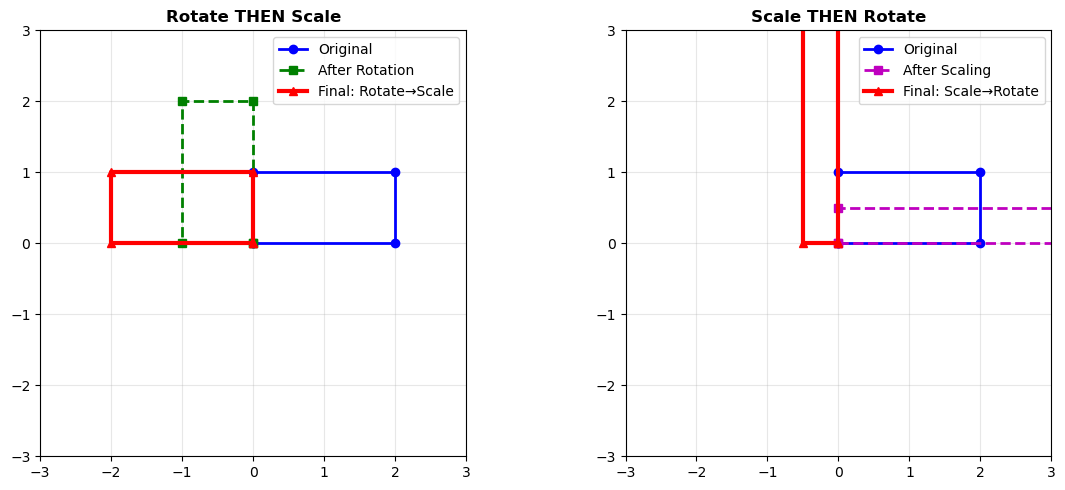


🎯 WHY THIS MATTERS:
• Computer graphics: Order of rotations/scaling affects final image
• Robotics: Sequence of joint movements matters
• Data processing: Order of transformations affects results


In [4]:
# Composition story: Rotate THEN Scale vs Scale THEN Rotate
rotation = np.array([[0, -1], [1, 0]])    # 90° counterclockwise
scaling = np.array([[2, 0], [0, 0.5]])    # Scale x by 2, y by 0.5

# Two different orders
rotate_then_scale = scaling @ rotation     # Applied right to left!
scale_then_rotate = rotation @ scaling

# Test vector
test_vector = np.array([[1], [0]])

print("🔄 COMPOSITION EXAMPLE: Rotate vs Scale Order")
print("=" * 50)
print(f"Original vector: {test_vector.flatten()}")
print(f"Rotation matrix:\n{rotation}")
print(f"Scaling matrix:\n{scaling}")

# Show both orders
result1 = rotate_then_scale @ test_vector
result2 = scale_then_rotate @ test_vector

print(f"\n📐 Method 1: Rotate THEN Scale")
print(f"(Scale @ Rotation) @ vector = {result1.flatten()}")

print(f"\n📐 Method 2: Scale THEN Rotate") 
print(f"(Rotation @ Scale) @ vector = {result2.flatten()}")

print(f"\n💥 DIFFERENT RESULTS! Order matters: AB ≠ BA")

# Visualize the composition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create a more interesting shape to transform
shape = np.array([[0, 2, 2, 0, 0], [0, 0, 1, 1, 0]])

# Show first composition
intermediate1 = rotation @ shape
final1 = scaling @ intermediate1

ax1.plot(shape[0], shape[1], 'b-', linewidth=2, label='Original', marker='o')
ax1.plot(intermediate1[0], intermediate1[1], 'g--', linewidth=2, label='After Rotation', marker='s')
ax1.plot(final1[0], final1[1], 'r-', linewidth=3, label='Final: Rotate→Scale', marker='^')
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_title('Rotate THEN Scale', fontweight='bold')

# Show second composition
intermediate2 = scaling @ shape
final2 = rotation @ intermediate2

ax2.plot(shape[0], shape[1], 'b-', linewidth=2, label='Original', marker='o')
ax2.plot(intermediate2[0], intermediate2[1], 'm--', linewidth=2, label='After Scaling', marker='s')
ax2.plot(final2[0], final2[1], 'r-', linewidth=3, label='Final: Scale→Rotate', marker='^')
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_title('Scale THEN Rotate', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🎯 WHY THIS MATTERS:")
print("• Computer graphics: Order of rotations/scaling affects final image")
print("• Robotics: Sequence of joint movements matters")
print("• Data processing: Order of transformations affects results")

## Chapter 4: Solving the Puzzle - Systems of Equations 🧩

**The Real-World Payoff:** All this transformation theory leads to solving **Ax = b** - finding which input **x** produces output **b** under transformation **A**.

**Three Scenarios:**
1. **Unique Solution:** A is invertible (det(A) ≠ 0)
2. **No Solution:** b is not in the column space of A  
3. **Infinite Solutions:** A is singular but b is in the column space


🔍 SCENARIO: Unique Solution
Matrix A:
[[2 1]
 [1 3]]
Vector b: [5 7]
Determinant: 5.000
✅ SOLUTION: x = [1.6 1.8]
✅ VERIFICATION: Ax = [5. 7.]

🔍 SCENARIO: No Solution
Matrix A:
[[1 2]
 [2 4]]
Vector b: [3 5]
Determinant: 0.000
❌ NO UNIQUE SOLUTION (singular matrix)
❌ NO SOLUTION (b not in column space)

🔍 SCENARIO: Infinite Solutions
Matrix A:
[[1 2]
 [2 4]]
Vector b: [3 6]
Determinant: 0.000
❌ NO UNIQUE SOLUTION (singular matrix)
✅ INFINITE SOLUTIONS (b in column space)
   One solution: x = [0.6 1.2]


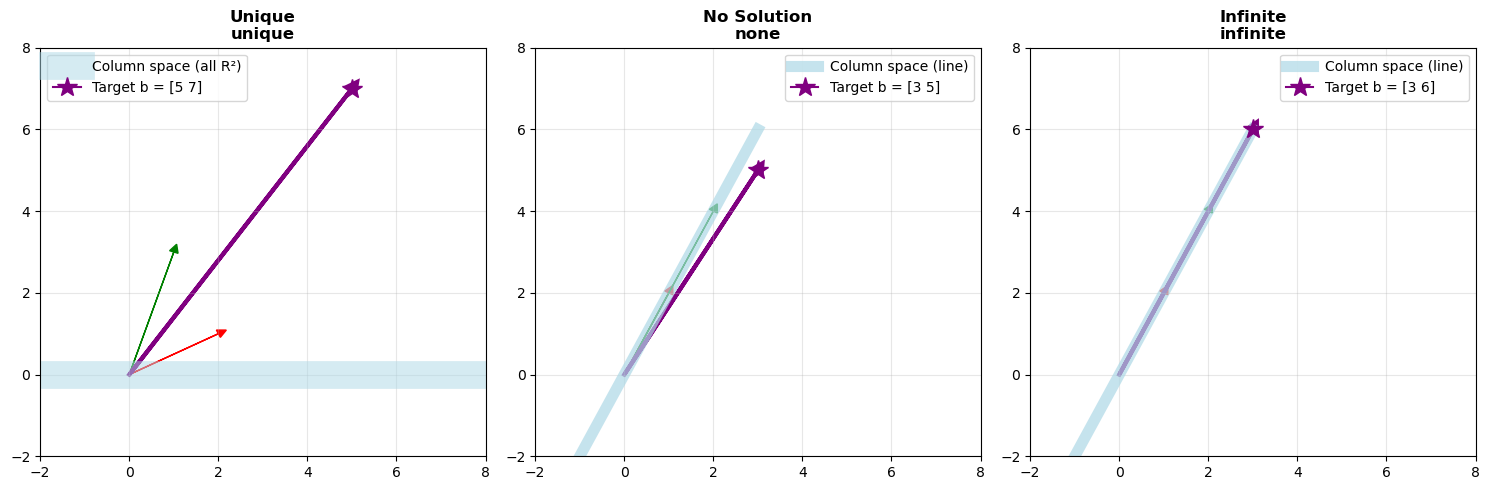


🎯 GEOMETRIC INTUITION:
• Unique: b can be reached by exactly one combination of columns
• No solution: b is outside the span of the columns
• Infinite: b is on the line, but line can be parameterized infinitely


In [5]:
# The three scenarios of Ax = b
def solve_system_story(A, b, title):
    """Show system solution with geometric interpretation"""
    print(f"\n🔍 SCENARIO: {title}")
    print("=" * 40)
    print(f"Matrix A:\n{A}")
    print(f"Vector b: {b}")
    print(f"Determinant: {np.linalg.det(A):.3f}")
    
    # Try to solve
    try:
        x = np.linalg.solve(A, b)
        print(f"✅ SOLUTION: x = {x}")
        print(f"✅ VERIFICATION: Ax = {A @ x}")
        return "unique"
    except np.linalg.LinAlgError:
        print("❌ NO UNIQUE SOLUTION (singular matrix)")
        # Check if b is in column space
        try:
            x = np.linalg.lstsq(A, b, rcond=None)[0]
            residual = np.linalg.norm(A @ x - b)
            if residual < 1e-10:
                print("✅ INFINITE SOLUTIONS (b in column space)")
                print(f"   One solution: x = {x}")
                return "infinite"
            else:
                print("❌ NO SOLUTION (b not in column space)")
                return "none"
        except:
            print("❌ NO SOLUTION")
            return "none"

# Scenario 1: Unique solution (invertible matrix)
A1 = np.array([[2, 1], [1, 3]])
b1 = np.array([5, 7])
result1 = solve_system_story(A1, b1, "Unique Solution")

# Scenario 2: No solution (singular matrix, b not in column space)
A2 = np.array([[1, 2], [2, 4]])  # Singular matrix
b2 = np.array([3, 5])            # Not in column space
result2 = solve_system_story(A2, b2, "No Solution")

# Scenario 3: Infinite solutions (singular matrix, b in column space)  
A3 = np.array([[1, 2], [2, 4]])  # Same singular matrix
b3 = np.array([3, 6])            # In column space (b3 = 3*[1,2])
result3 = solve_system_story(A3, b3, "Infinite Solutions")

# Visualize the geometric meaning
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

scenarios = [(A1, b1, "Unique", result1), (A2, b2, "No Solution", result2), (A3, b3, "Infinite", result3)]

for idx, (A, b, title, result) in enumerate(scenarios):
    ax = axes[idx]
    
    # Plot the column space of A (span of columns)
    col1, col2 = A[:, 0], A[:, 1]
    
    if np.linalg.det(A) != 0:
        # Non-singular: column space is entire R²
        ax.axhline(y=0, color='lightblue', alpha=0.5, linewidth=20, label='Column space (all R²)')
    else:
        # Singular: column space is a line
        t = np.linspace(-3, 3, 100)
        line_x = col1[0] * t
        line_y = col1[1] * t
        ax.plot(line_x, line_y, 'lightblue', linewidth=8, alpha=0.7, label='Column space (line)')
    
    # Plot column vectors
    ax.arrow(0, 0, col1[0], col1[1], head_width=0.2, head_length=0.2, fc='red', ec='red')
    ax.arrow(0, 0, col2[0], col2[1], head_width=0.2, head_length=0.2, fc='green', ec='green')
    
    # Plot target vector b
    ax.arrow(0, 0, b[0], b[1], head_width=0.2, head_length=0.2, fc='purple', ec='purple', linewidth=3)
    ax.plot(b[0], b[1], 'purple', marker='*', markersize=15, label=f'Target b = {b}')
    
    ax.set_xlim(-2, 8)
    ax.set_ylim(-2, 8)
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_title(f'{title}\n{result}', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🎯 GEOMETRIC INTUITION:")
print("• Unique: b can be reached by exactly one combination of columns")
print("• No solution: b is outside the span of the columns") 
print("• Infinite: b is on the line, but line can be parameterized infinitely")

## Chapter 5: The Undo Button - Matrix Inverses ↩️

**The Reverse Engineering:** If A transforms x into b, then A⁻¹ transforms b back into x.

**The Magic Formula:** For 2×2 matrices: A⁻¹ = (1/det(A)) × [d, -b; -c, a]

**The Catch:** Only works when det(A) ≠ 0 (transformation preserves information).

🔄 INVERSE TRANSFORMATION DEMO
Original matrix A:
[[2 1]
 [1 2]]
Determinant: 2.9999999999999996
Inverse A⁻¹:
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
NumPy check:
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]


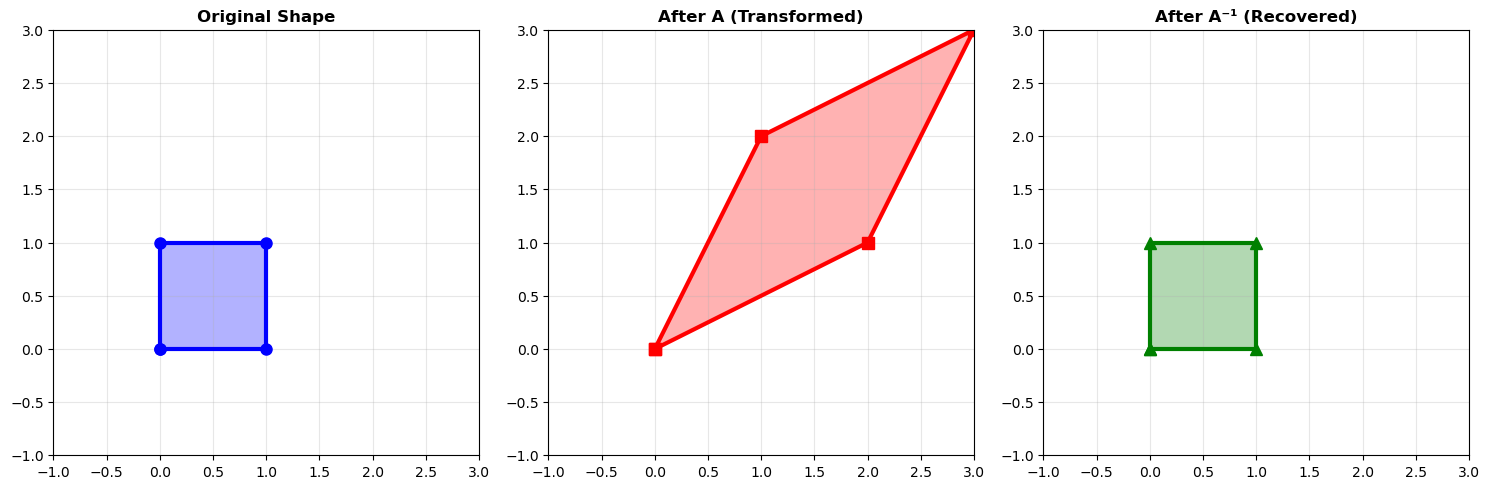


✅ PERFECT RECOVERY: Max error = 0.00e+00

🎯 IDENTITY CHECK:
A × A⁻¹ = 
[[1. 0.]
 [0. 1.]]
Is this I? True

💡 KEY INSIGHT: A⁻¹ is the 'undo' transformation!
   Forward: A takes you from original to transformed
   Backward: A⁻¹ takes you from transformed back to original


In [6]:
# The inverse transformation story
A = np.array([[2, 1], [1, 2]])
print("🔄 INVERSE TRANSFORMATION DEMO")
print("=" * 40)
print(f"Original matrix A:\n{A}")

# Calculate inverse using formula
det_A = np.linalg.det(A)
a, b, c, d = A[0,0], A[0,1], A[1,0], A[1,1]
A_inv_manual = (1/det_A) * np.array([[d, -b], [-c, a]])

print(f"Determinant: {det_A}")
print(f"Inverse A⁻¹:\n{A_inv_manual}")
print(f"NumPy check:\n{np.linalg.inv(A)}")

# Test the undo property
test_shape = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])
transformed = A @ test_shape
recovered = A_inv_manual @ transformed

# Visualize the round trip
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original
axes[0].plot(test_shape[0], test_shape[1], 'b-', linewidth=3, marker='o', markersize=8)
axes[0].fill(test_shape[0], test_shape[1], alpha=0.3, color='blue')
axes[0].set_title('Original Shape', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')
axes[0].set_xlim(-1, 3)
axes[0].set_ylim(-1, 3)

# Transformed
axes[1].plot(transformed[0], transformed[1], 'r-', linewidth=3, marker='s', markersize=8)
axes[1].fill(transformed[0], transformed[1], alpha=0.3, color='red')
axes[1].set_title('After A (Transformed)', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')
axes[1].set_xlim(-1, 3)
axes[1].set_ylim(-1, 3)

# Recovered
axes[2].plot(recovered[0], recovered[1], 'g-', linewidth=3, marker='^', markersize=8)
axes[2].fill(recovered[0], recovered[1], alpha=0.3, color='green')
axes[2].set_title('After A⁻¹ (Recovered)', fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_aspect('equal')
axes[2].set_xlim(-1, 3)
axes[2].set_ylim(-1, 3)

plt.tight_layout()
plt.show()

# Verify perfect recovery
recovery_error = np.max(np.abs(test_shape - recovered))
print(f"\n✅ PERFECT RECOVERY: Max error = {recovery_error:.2e}")

# Show the identity property
identity_check = A @ A_inv_manual
print(f"\n🎯 IDENTITY CHECK:")
print(f"A × A⁻¹ = \n{identity_check}")
print(f"Is this I? {np.allclose(identity_check, np.eye(2))}")

print(f"\n💡 KEY INSIGHT: A⁻¹ is the 'undo' transformation!")
print(f"   Forward: A takes you from original to transformed")
print(f"   Backward: A⁻¹ takes you from transformed back to original")

## Chapter 6: The Information Keeper - Determinants 📐

**The Final Truth:** The determinant tells you everything about information preservation:

- **det(A) = 0**: Information is **lost** (space collapses)
- **det(A) ≠ 0**: Information is **preserved** (transformation is reversible)
- **|det(A)|**: How much **area/volume** changes
- **sign(det(A))**: Whether **orientation** flips

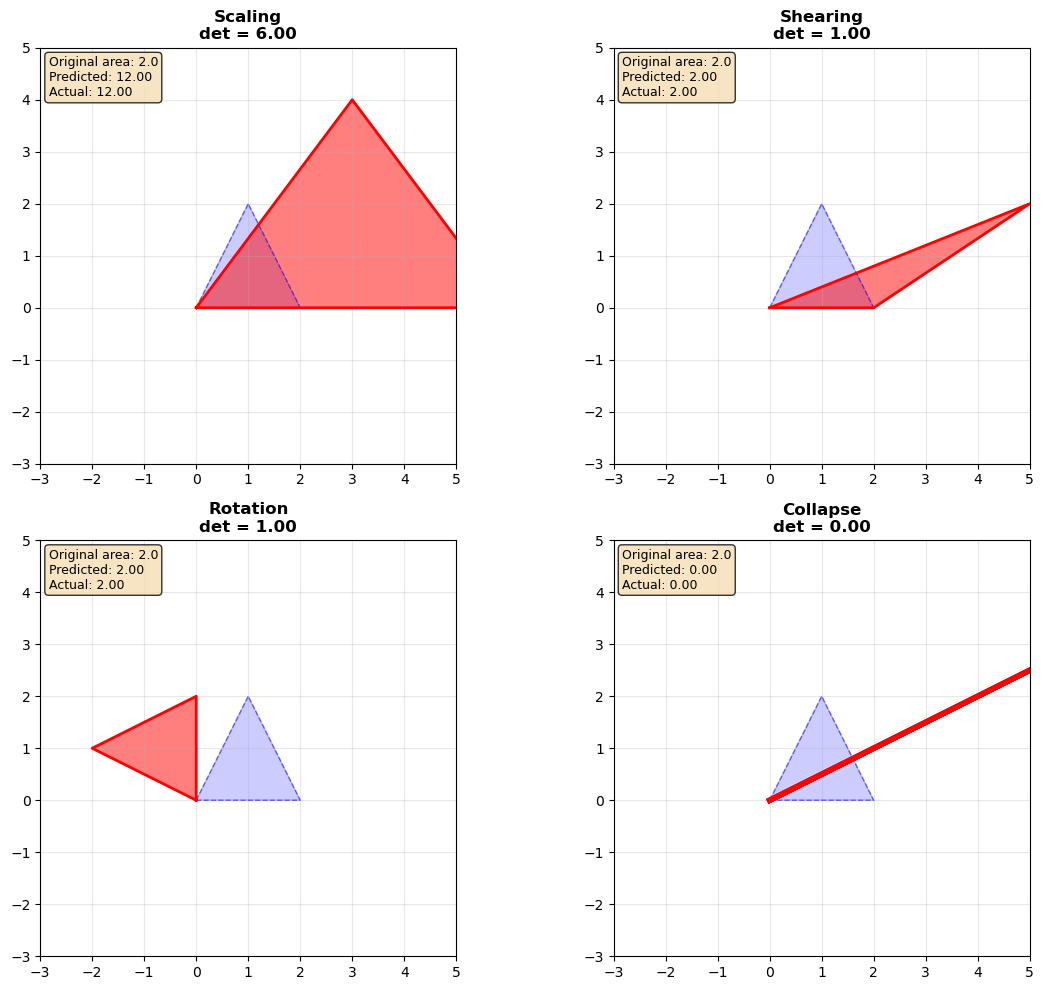

🔍 DETERMINANT DECODER:
• det = 3×2 = 6: Area multiplied by 6 (scaling)
• det = 1×1 - 2×0 = 1: Area unchanged (shearing preserves area!)
• det = 0×0 - (-1)×1 = 1: Area unchanged (rotation preserves area!)
• det = 2×2 - 4×1 = 0: Area becomes zero (collapse!)

💡 UNIVERSAL TRUTH: |det(A)| = Area scaling factor
   This works for ANY shape, not just triangles!


In [7]:
# The determinant story - information preservation
def show_determinant_effects():
    """Demonstrate how determinants predict area changes"""
    matrices = [
        (np.array([[3, 0], [0, 2]]), "Scaling"),
        (np.array([[1, 2], [0, 1]]), "Shearing"), 
        (np.array([[0, -1], [1, 0]]), "Rotation"),
        (np.array([[2, 4], [1, 2]]), "Collapse"),
    ]
    
    # Create an interesting shape to transform
    triangle = np.array([[0, 2, 1, 0], [0, 0, 2, 0]])
    original_area = 0.5 * 2 * 2  # Triangle area = 2
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    for idx, (matrix, name) in enumerate(matrices):
        ax = axes[idx]
        
        # Transform the triangle
        transformed = matrix @ triangle
        det = np.linalg.det(matrix)
        predicted_area = abs(det) * original_area
        
        # Plot original (transparent)
        ax.plot(triangle[0], triangle[1], 'b--', alpha=0.5, linewidth=1)
        ax.fill(triangle[0], triangle[1], alpha=0.2, color='blue')
        
        # Plot transformed
        if abs(det) < 1e-10:  # Singular case
            ax.plot(transformed[0], transformed[1], 'r-', linewidth=4, label='Collapsed')
            actual_area = 0
        else:
            ax.plot(transformed[0], transformed[1], 'r-', linewidth=2)
            ax.fill(transformed[0], transformed[1], alpha=0.5, color='red')
            # Calculate actual area using cross product
            if transformed.shape[1] >= 3:
                v1 = transformed[:, 1] - transformed[:, 0]
                v2 = transformed[:, 2] - transformed[:, 0]
                actual_area = 0.5 * abs(v1[0]*v2[1] - v1[1]*v2[0])
            else:
                actual_area = 0
        
        ax.set_xlim(-3, 5)
        ax.set_ylim(-3, 5)
        ax.grid(True, alpha=0.3)
        ax.set_aspect('equal')
        ax.set_title(f'{name}\ndet = {det:.2f}', fontweight='bold')
        
        # Add area information
        ax.text(0.02, 0.98, f'Original area: {original_area:.1f}\nPredicted: {predicted_area:.2f}\nActual: {actual_area:.2f}', 
                transform=ax.transAxes, verticalalignment='top', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

show_determinant_effects()

print("🔍 DETERMINANT DECODER:")
print("• det = 3×2 = 6: Area multiplied by 6 (scaling)")
print("• det = 1×1 - 2×0 = 1: Area unchanged (shearing preserves area!)")  
print("• det = 0×0 - (-1)×1 = 1: Area unchanged (rotation preserves area!)")
print("• det = 2×2 - 4×1 = 0: Area becomes zero (collapse!)")

print("\n💡 UNIVERSAL TRUTH: |det(A)| = Area scaling factor")
print("   This works for ANY shape, not just triangles!")

## The Grand Finale: Where Matrices Rule the World 🌍

**Now you understand the secret:** Almost everything in the modern world runs on matrix transformations!

🌟 MATRICES IN THE REAL WORLD

🎮 Computer Graphics:
  • 3D object rotations
  • Screen projections
  • Lighting effects
  • Animation transformations

🤖 Machine Learning:
  • Principal Component Analysis (PCA)
  • Neural network weights
  • Data preprocessing
  • Feature transformations

📊 Data Science:
  • Solving regression (normal equations)
  • Dimensionality reduction
  • Correlation analysis
  • Image processing

🏗️ Engineering:
  • Structural analysis
  • Control systems
  • Signal processing
  • Finite element methods

🔬 Physics:
  • Quantum mechanics (operators)
  • Relativity transformations
  • Wave equations
  • Electromagnetic fields

💰 Economics:
  • Input-output models
  • Portfolio optimization
  • Market equilibrium
  • Risk analysis

🔬 EXAMPLE: Principal Component Analysis (PCA)
Covariance matrix determinant: 0.213
Eigenvalues: [0.91762912 0.23252548]
Principal components (eigenvectors):
[[ 0.8753871  -0.48342261]
 [ 0.48342261  0.8753871 ]]


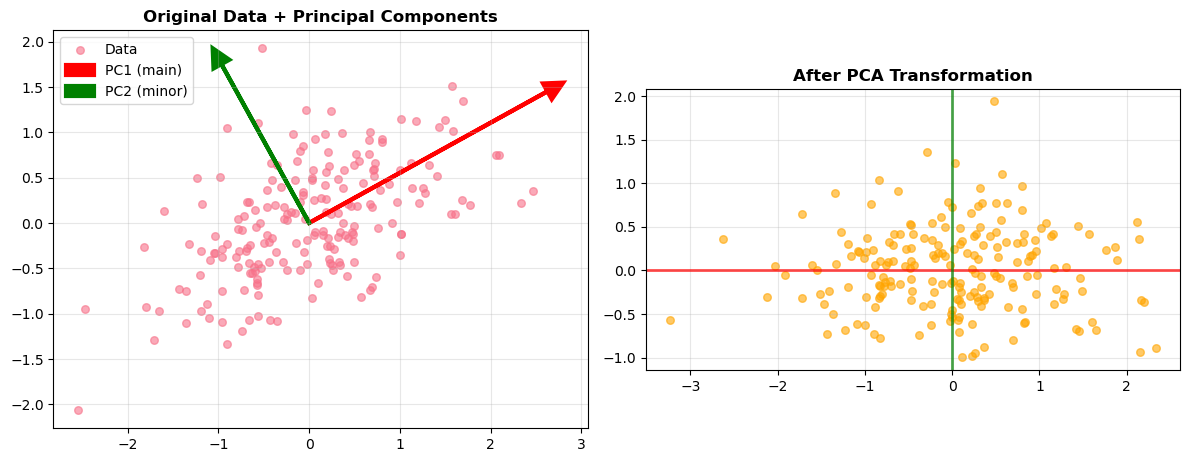


🎯 PCA USES MATRICES TO:
  • Find directions of maximum variance (eigenvectors)
  • Transform data to uncorrelated coordinates
  • Reduce dimensionality while preserving information
  • All through matrix transformations!


In [8]:
# Real-world applications showcase
applications = {
    "🎮 Computer Graphics": [
        "3D object rotations",
        "Screen projections", 
        "Lighting effects",
        "Animation transformations"
    ],
    "🤖 Machine Learning": [
        "Principal Component Analysis (PCA)",
        "Neural network weights",
        "Data preprocessing",
        "Feature transformations"
    ],
    "📊 Data Science": [
        "Solving regression (normal equations)",
        "Dimensionality reduction",
        "Correlation analysis",
        "Image processing"
    ],
    "🏗️ Engineering": [
        "Structural analysis",
        "Control systems",
        "Signal processing",
        "Finite element methods"
    ],
    "🔬 Physics": [
        "Quantum mechanics (operators)",
        "Relativity transformations",
        "Wave equations",
        "Electromagnetic fields"
    ],
    "💰 Economics": [
        "Input-output models",
        "Portfolio optimization",
        "Market equilibrium",
        "Risk analysis"
    ]
}

print("🌟 MATRICES IN THE REAL WORLD")
print("=" * 50)

for field, examples in applications.items():
    print(f"\n{field}:")
    for example in examples:
        print(f"  • {example}")

# Show a simple ML example - PCA
print(f"\n🔬 EXAMPLE: Principal Component Analysis (PCA)")
print("=" * 50)

# Generate correlated 2D data
np.random.seed(42)
n_points = 200
angle = np.pi / 6  # 30 degrees

# Create data with correlation
raw_data = np.random.randn(n_points, 2)
raw_data[:, 1] = 0.5 * raw_data[:, 1]  # Less variance in y

# Rotate to create correlation
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], 
                           [np.sin(angle), np.cos(angle)]])
data = (rotation_matrix @ raw_data.T).T

# PCA: Find principal components
cov_matrix = np.cov(data.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort by eigenvalue (largest first)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print(f"Covariance matrix determinant: {np.linalg.det(cov_matrix):.3f}")
print(f"Eigenvalues: {eigenvalues}")
print(f"Principal components (eigenvectors):\n{eigenvectors}")

# Visualize PCA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original data
ax1.scatter(data[:, 0], data[:, 1], alpha=0.6, s=30)
ax1.arrow(0, 0, eigenvectors[0,0]*3, eigenvectors[1,0]*3, 
          head_width=0.2, head_length=0.2, fc='red', ec='red', linewidth=3)
ax1.arrow(0, 0, eigenvectors[0,1]*2, eigenvectors[1,1]*2, 
          head_width=0.2, head_length=0.2, fc='green', ec='green', linewidth=3)
ax1.set_title('Original Data + Principal Components', fontweight='bold')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend(['Data', 'PC1 (main)', 'PC2 (minor)'])

# Transformed data (PCA coordinates)
pca_data = (eigenvectors.T @ data.T).T
ax2.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.6, s=30, color='orange')
ax2.axhline(y=0, color='red', linewidth=2, alpha=0.7)
ax2.axvline(x=0, color='green', linewidth=2, alpha=0.7)
ax2.set_title('After PCA Transformation', fontweight='bold')
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 PCA USES MATRICES TO:")
print(f"  • Find directions of maximum variance (eigenvectors)")
print(f"  • Transform data to uncorrelated coordinates")
print(f"  • Reduce dimensionality while preserving information")
print(f"  • All through matrix transformations!")

## 🎓 The Complete Matrix Story - What You've Learned

### **The Big Picture Revealed**

**Matrices are transformation machines** that move vectors around in space. Every matrix tells a complete story:

1. **🎯 The Transformation**: What the matrix does to space (scale, rotate, shear, reflect)
2. **🔗 The Composition**: How transformations combine (matrix multiplication)  
3. **🧩 The Solution**: How to solve systems of equations (Ax = b)
4. **↩️ The Inverse**: How to undo transformations (A⁻¹)
5. **📐 The Information**: Whether information is preserved (determinant)

### **The Universal Principles**

| **Concept** | **Geometric Meaning** | **Algebraic Formula** | **Real-World Impact** |
|-------------|----------------------|----------------------|----------------------|
| **Matrix-Vector Product** | Moving a point in space | Ax = b | Computer graphics, ML predictions |
| **Matrix Multiplication** | Chaining transformations | C = AB | Animation sequences, data pipelines |
| **Determinant** | Area/volume scaling | det(A) = ad - bc | Information preservation check |
| **Matrix Inverse** | Undoing transformation | A⁻¹A = I | Solving equations, error correction |
| **Linear Independence** | Non-redundant directions | det(A) ≠ 0 | Feature selection, dimensionality |

### **The Power You Now Possess** ⚡

**You can now:**
- ✅ **Visualize** any 2×2 transformation geometrically
- ✅ **Predict** whether a system has unique/infinite/no solutions  
- ✅ **Compute** inverses and determinants by hand
- ✅ **Understand** why machine learning algorithms work
- ✅ **Debug** numerical issues in data science projects
- ✅ **Connect** abstract math to concrete applications

### **Your Next Adventures** 🚀

**Advanced Topics Await:**
- **Eigenvalues & Eigenvectors**: Special directions that only get scaled
- **Singular Value Decomposition**: The ultimate matrix factorization
- **Matrix Calculus**: How matrices change and optimize
- **Tensor Operations**: Generalizing to higher dimensions

**Remember**: Every pixel on your screen, every AI prediction, every 3D game character - they all depend on the matrix concepts you now understand. You've learned the mathematical language that powers the modern world! 🌟

---

*"Mathematics is the language with which God has written the universe."* - Galileo Galilei

**You now speak this language fluently when it comes to linear transformations!** 🎭✨